In [4]:
# setup
import os, pandas as pd 
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text
from dotenv import load_dotenv

plt.rcParams["figure.dpi"] = 140
plt.rcParams["axes.grid"] = True

load_dotenv()
engine = create_engine(os.getenv("DATABASE_URL"))

def q(sql, params=None):
    with engine.begin() as con:
        return pd.read_sql(text(sql), con, params=params)

In [9]:
# Analyse average track features by subgenre
sql = """
SELECT
    st.playlist_subgenre,
    COUNT(*) AS n,
    AVG(st.danceability)::float AS avg_danceability,
    AVG(st.energy)::float AS avg_energy,
    AVG(st.valence)::float AS avg_valence,
    AVG(st.tempo)::float AS avg_tempo,
    AVG(st.loudness)::float AS avg_loudness_db
FROM staging_tracks st
GROUP BY st.playlist_subgenre
ORDER BY n DESC;
"""

df_genre = q(sql)
df_genre.head()

,playlist_subgenre,n,avg_danceability,avg_energy,avg_valence,avg_tempo,avg_loudness_db
0,southern hip hop,3166,0.712627,0.681145,0.554645,118.906871,-6.959708
1,indie poptimism,3094,0.625849,0.637175,0.456226,118.012863,-7.162278
2,neo soul,2956,0.644409,0.540869,0.511833,110.135174,-8.378233
3,progressive electro house,2920,0.653855,0.810262,0.385516,126.290612,-5.801666
4,electro house,2832,0.704478,0.802486,0.429057,125.197134,-5.857287


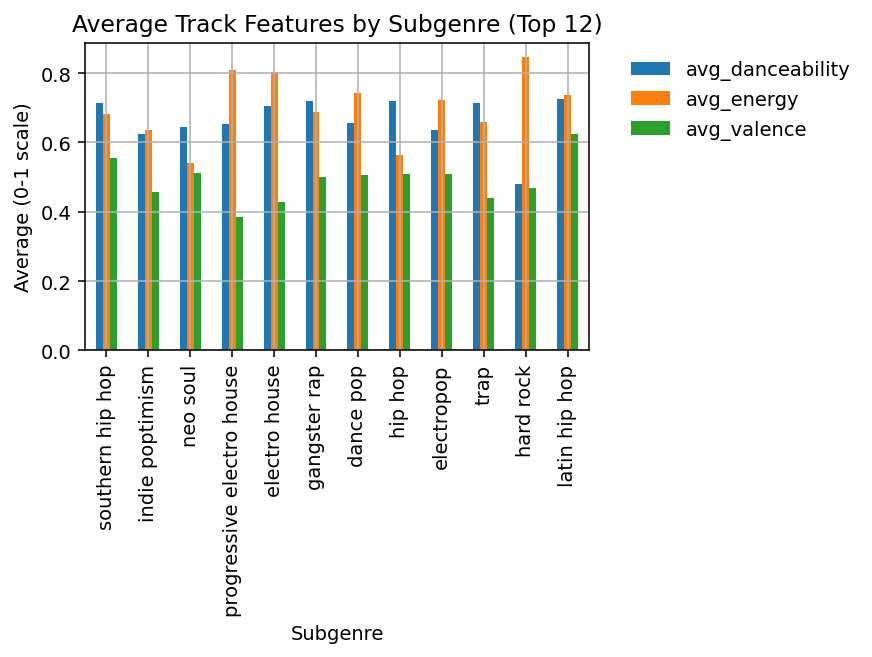

In [13]:
# Plot average features for top 12 subgenres
top = df_genre.sort_values("n", ascending=False).head(12).copy()

ax = top.plot(
    x="playlist_subgenre",
    y=["avg_danceability", "avg_energy", "avg_valence"],
    kind="bar",
)
ax.set_title("Average Track Features by Subgenre (Top 12)")
ax.set_xlabel("Subgenre")
ax.set_ylabel("Average (0-1 scale)")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.tight_layout()
plt.savefig("../figures/subgenre_feature_profile.png")
plt.show()

